# Sentiment Classification & How To "Frame Problems" for a Neural Network


# Curate a Dataset<a id='lesson_1'></a>

In [1]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [2]:
len(reviews)

25000

In [3]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [4]:
labels[0]

'POSITIVE'

# Develop a Predictive Theory<a id='lesson_2'></a>

In [5]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


In [6]:
from collections import Counter
import numpy as np

We'll create three `Counter` objects, one for words from postive reviews, one for words from negative reviews, and one for all the words.

In [7]:
# Create three Counter objects to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

**TODO:** Examine all the reviews. For each word in a positive review, increase the count for that word in both your positive counter and the total words counter; likewise, for each word in a negative review, increase the count for that word in both your negative counter and the total words counter.



In [8]:
# Loop over all the words in all the reviews and increment the counts in the appropriate counter objects
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [9]:
# Examine the counts of the most common words in positive reviews
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [10]:
# Examine the counts of the most common words in negative reviews
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

As you can see, common words like "the" appear very often in both positive and negative reviews. Instead of finding the most common words in positive or negative reviews, what you really want are the words found in positive reviews more often than in negative reviews, and vice versa. To accomplish this, you'll need to calculate the **ratios** of word usage between positive and negative reviews.




In [11]:
pos_neg_ratios = Counter()

# Calculate the ratios of positive and negative uses of the most common words
# Consider words to be "common" if they've been used at least 100 times
for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

In [12]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.0607993145235326
Pos-to-neg ratio for 'amazing' = 4.022813688212928
Pos-to-neg ratio for 'terrible' = 0.17744252873563218


Looking closely at the values you just calculated, we see the following: 

* Words that you would expect to see more often in positive reviews – like "amazing" – have a ratio greater than 1. The more skewed a word is toward postive, the farther from 1 its positive-to-negative ratio  will be.
* Words that you would expect to see more often in negative reviews – like "terrible" – have positive values that are less than 1. The more skewed a word is toward negative, the closer to zero its positive-to-negative ratio will be.
* Neutral words, which don't really convey any sentiment because you would expect to see them in all sorts of reviews – like "the" – have values very close to 1. A perfectly neutral word – one that was used in exactly the same number of positive reviews as negative reviews – would be almost exactly 1. The `+1` we suggested you add to the denominator slightly biases words toward negative, but it won't matter because it will be a tiny bias and later we'll be ignoring words that are too close to neutral anyway.

Ok, the ratios tell us which words are used more often in postive or negative reviews, but the specific values we've calculated are a bit difficult to work with. A very positive word like "amazing" has a value above 4, whereas a very negative word like "terrible" has a value around 0.18. Those values aren't easy to compare for a couple of reasons:

* Right now, 1 is considered neutral, but the absolute value of the postive-to-negative rations of very postive words is larger than the absolute value of the ratios for the very negative words. So there is no way to directly compare two numbers and see if one word conveys the same magnitude of positive sentiment as another word conveys negative sentiment. So we should center all the values around netural so the absolute value fro neutral of the postive-to-negative ratio for a word would indicate how much sentiment (positive or negative) that word conveys.
* When comparing absolute values it's easier to do that around zero than one. 

To fix these issues, we'll convert all of our ratios to new values using logarithms.



In [13]:
# Convert ratios to logs
for word,ratio in pos_neg_ratios.most_common():
    pos_neg_ratios[word] = np.log(ratio)

**NOTE:** 
> * For any postive words, convert the ratio using `np.log(ratio)`
> * For any negative words, convert the ratio using `-np.log(1/(ratio + 0.01))`

These won't give you the exact same results as the simpler code we show in this notebook, but the values will be similar. In case that second equation looks strange, here's what it's doing: First, it divides one by a very small number, which will produce a larger positive number. Then, it takes the `log` of that, which produces numbers similar to the ones for the postive words. Finally, it negates the values by adding that minus sign up front. The results are extremely positive and extremely negative words having positive-to-negative ratios with similar magnitudes but oppositite signs, just like when we use `np.log(ratio)`.

In [14]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 0.05902269426102881
Pos-to-neg ratio for 'amazing' = 1.3919815802404802
Pos-to-neg ratio for 'terrible' = -1.7291085042663878


If everything worked, now you should see neutral words with values close to zero. In this case, "the" is near zero but slightly positive, so it was probably used in more positive reviews than negative reviews. But look at "amazing"'s ratio - it's above `1`, showing it is clearly a word with positive sentiment. And "terrible" has a similar score, but in the opposite direction, so it's below `-1`. It's now clear that both of these words are associated with specific, opposing sentiments.

The first cell displays all the words, ordered by how associated they are with postive reviews. (Your notebook will most likely truncate the output so you won't actually see *all* the words in the list.)

The second cell displays the 30 words most associated with negative reviews by reversing the order of the first list and then looking at the first 30 words. (If you want the second cell to display all the words, ordered by how associated they are with negative reviews, you could just write `reversed(pos_neg_ratios.most_common())`.)


In [15]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.07753744390572),
 ('felix', 3.152736022363656),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.80672172860924),
 ('victoria', 2.681021528714291),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.538973871058276),
 ('flawless', 2.451005098112319),
 ('superbly', 2.26002547857525),
 ('perfection', 2.159484249353372),
 ('astaire', 2.1400661634962708),
 ('captures', 2.038619547159581),
 ('voight', 2.030170492673053),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.978345424808467),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('soccer', 1.757857

In [16]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

# Note: Above is the code Andrew uses in his solution video, 
#       so we've included it here to avoid confusion.
#       If you explore the documentation for the Counter class, 
#       you will see you could also find the 30 least common
#       words like this: pos_neg_ratios.most_common()[:-31:-1]

[('boll', -4.969813299576001),
 ('uwe', -4.624972813284271),
 ('seagal', -3.644143560272545),
 ('unwatchable', -3.258096538021482),
 ('stinker', -3.2088254890146994),
 ('mst', -2.9502698994772336),
 ('incoherent', -2.9368917735310576),
 ('unfunny', -2.6922395950755678),
 ('waste', -2.6193845640165536),
 ('blah', -2.5704288232261625),
 ('horrid', -2.4849066497880004),
 ('pointless', -2.4553061800117097),
 ('atrocious', -2.4259083090260445),
 ('redeeming', -2.3682390632154826),
 ('prom', -2.3608540011180215),
 ('drivel', -2.3470368555648795),
 ('lousy', -2.307572634505085),
 ('worst', -2.286987896180378),
 ('laughable', -2.264363880173848),
 ('awful', -2.227194247027435),
 ('poorly', -2.2207550747464135),
 ('wasting', -2.204604684633842),
 ('remotely', -2.1972245773362196),
 ('existent', -2.0794415416798357),
 ('boredom', -1.995100393246085),
 ('miserably', -1.9924301646902063),
 ('sucks', -1.987068221548821),
 ('uninspired', -1.9832976811269336),
 ('lame', -1.981767458946166),
 ('insult


# Transforming Text into Numbers<a id='lesson_3'></a>

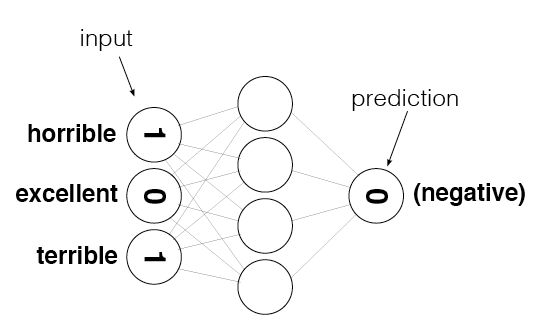

In [17]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

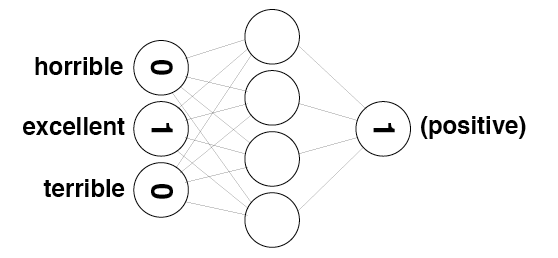

In [18]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Creating the Input/Output Data<a id='project_2'></a>

**TODO:** Create a [set](https://docs.python.org/3/tutorial/datastructures.html#sets) named `vocab` that contains every word in the vocabulary.

In [19]:
vocab = set(total_counts.keys())

In [20]:
vocab_size = len(vocab)
print(vocab_size)

74074


**TODO:** Create a numpy array called `layer_0` and initialize it to all zeros. You will find the [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) function particularly helpful here. Be sure you create `layer_0` as a 2-dimensional matrix with 1 row and `vocab_size` columns. 

In [21]:
layer_0 = np.zeros((1,vocab_size))

Run the following cell. It should display `(1, 74074)`

In [22]:
layer_0.shape

(1, 74074)

`layer_0` contains one entry for every word in the vocabulary, as shown in the above image. We need to make sure we know the index of each word, so run the following cell to create a lookup table that stores the index of every word.

In [23]:
# Create a dictionary of words in the vocabulary mapped to index positions 
# (to be used in layer_0)
word2index = {}
for i,word in enumerate(vocab):
    word2index[word] = i
    
# display the map of words to indices
word2index

{'': 0,
 'chambermaid': 1,
 'recogniton': 2,
 'caroling': 3,
 'scan': 4,
 'genma': 5,
 'logs': 6,
 'guilted': 7,
 'leathal': 8,
 'piercing': 9,
 'shungiku': 10,
 'incarnated': 11,
 'gowns': 12,
 'doo': 13,
 'hjm': 14,
 'mayumi': 15,
 'maize': 16,
 'transamerica': 17,
 'beeing': 18,
 'snide': 19,
 'soldiering': 20,
 'editions': 21,
 'leporidae': 22,
 'occasionally': 23,
 'creeds': 24,
 'enrapture': 25,
 'inanity': 26,
 'full': 27,
 'whitepages': 28,
 'abhisheh': 29,
 'during': 30,
 'skirt': 31,
 'firefighters': 32,
 'pent': 33,
 'ava': 34,
 'synchronize': 35,
 'worked': 36,
 'yammering': 37,
 'huckster': 38,
 'apposite': 39,
 'faun': 40,
 'celaschi': 41,
 'kinnepolis': 42,
 'talespeter': 43,
 'wildcats': 44,
 'superficialities': 45,
 'daysthis': 46,
 'yamashiro': 47,
 'sworn': 48,
 'fiilthy': 49,
 'night': 50,
 'approximately': 51,
 'photons': 52,
 'peep': 53,
 'exwife': 54,
 'crticos': 55,
 'zim': 56,
 'boutique': 57,
 'bittersweetly': 58,
 'kedrova': 59,
 'kotero': 60,
 'obtrusively':

**TODO:**  Complete the implementation of `update_input_layer`. It should count 
          how many times each word is used in the given review, and then store
          those counts at the appropriate indices inside `layer_0`.

In [24]:
def update_input_layer(review):
    """ Modify the global layer_0 to represent the vector form of review.
    The element at a given index of layer_0 should represent
    how many times the given word occurs in the review.
    Args:
        review(string) - the string of the review
    Returns:
        None
    """
     
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    
    # count how many times each word is used in the given review and store the results in layer_0 
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

In [25]:
update_input_layer(reviews[0])
layer_0

array([[18.,  0.,  0., ...,  0.,  0.,  0.]])

**TODO:** Complete the implementation of `get_target_for_labels`. It should return `0` or `1`, 
          depending on whether the given label is `NEGATIVE` or `POSITIVE`, respectively.

In [26]:
def get_target_for_label(label):
    """Convert a label to `0` or `1`.
    Args:
        label(string) - Either "POSITIVE" or "NEGATIVE".
    Returns:
        `0` or `1`.
    """
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0

In [27]:
labels[0]

'POSITIVE'

In [28]:
get_target_for_label(labels[0])

1

In [29]:
labels[1]

'NEGATIVE'

In [30]:
get_target_for_label(labels[1])

0

# Building a Neural Network<a id='project_3'></a>

**TODO:** 
- Create a basic neural network much like the networks you've seen in earlier lessons and in Project 1, with an input layer, a hidden layer, and an output layer. 
- Do **not** add a non-linearity in the hidden layer. That is, do not use an activation function when calculating the hidden layer outputs.
- Re-use the code from earlier in this notebook to create the training data (see `TODO`s in the code)
- Implement the `pre_process_data` function to create the vocabulary for our training data generating functions
- Ensure `train` trains over the entire corpus

In [31]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        # populate review_vocab with all of the words in the given reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)

        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        # populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights

        # These are the weights between the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        # The input layer, a two-dimensional matrix with shape 1 x input_nodes
        self.layer_0 = np.zeros((1,input_nodes))
    
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0

        # Remember when we started for printing time statistics
        start = time.time()
        
        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            
            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            # Keep track of correct predictions.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # Run a forward pass through the network, like in the "train" function.
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # return NEGATIVE for other values
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [32]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [33]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):415.3 #Correct:500 #Tested:1000 Testing Accuracy:50.0%

In [34]:
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):88.50 #Correct:1251 #Trained:2501 Training Accuracy:50.0%
Progress:20.8% Speed(reviews/sec):88.38 #Correct:2501 #Trained:5001 Training Accuracy:50.0%
Progress:31.2% Speed(reviews/sec):79.01 #Correct:3751 #Trained:7501 Training Accuracy:50.0%
Progress:41.6% Speed(reviews/sec):80.31 #Correct:5001 #Trained:10001 Training Accuracy:50.0%
Progress:52.0% Speed(reviews/sec):81.63 #Correct:6251 #Trained:12501 Training Accuracy:50.0%
Progress:62.5% Speed(reviews/sec):82.35 #Correct:7501 #Trained:15001 Training Accuracy:50.0%
Progress:72.9% Speed(reviews/sec):82.90 #Correct:8751 #Trained:17501 Training Accuracy:50.0%
Progress:83.3% Speed(reviews/sec):83.39 #Correct:10001 #Trained:20001 Training Accuracy:50.0%
Progress:93.7% Speed(reviews/sec):83.77 #Correct:11251 #Trained:22501 Training Accuracy:50.0%
Progress:99.9% Speed(reviews/sec):83.91 #Correct:12000 #Trained:24000 Training Ac

That most likely didn't train very well. Part of the reason may be because the learning rate is too high. Run the following cell to recreate the network with a smaller learning rate, `0.01`, and then train the new network.

In [35]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):86.57 #Correct:1248 #Trained:2501 Training Accuracy:49.9%
Progress:20.8% Speed(reviews/sec):85.65 #Correct:2498 #Trained:5001 Training Accuracy:49.9%
Progress:31.2% Speed(reviews/sec):85.98 #Correct:3748 #Trained:7501 Training Accuracy:49.9%
Progress:41.6% Speed(reviews/sec):86.17 #Correct:4998 #Trained:10001 Training Accuracy:49.9%
Progress:52.0% Speed(reviews/sec):86.14 #Correct:6248 #Trained:12501 Training Accuracy:49.9%
Progress:62.5% Speed(reviews/sec):86.02 #Correct:7493 #Trained:15001 Training Accuracy:49.9%
Progress:72.9% Speed(reviews/sec):86.01 #Correct:8743 #Trained:17501 Training Accuracy:49.9%
Progress:83.3% Speed(reviews/sec):85.96 #Correct:9993 #Trained:20001 Training Accuracy:49.9%
Progress:93.7% Speed(reviews/sec):85.89 #Correct:11243 #Trained:22501 Training Accuracy:49.9%
Progress:99.9% Speed(reviews/sec):85.91 #Correct:11992 #Trained:24000 Training Acc

In [36]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):86.07 #Correct:1262 #Trained:2501 Training Accuracy:50.4%
Progress:20.8% Speed(reviews/sec):85.69 #Correct:2555 #Trained:5001 Training Accuracy:51.0%
Progress:31.2% Speed(reviews/sec):85.34 #Correct:3949 #Trained:7501 Training Accuracy:52.6%
Progress:41.6% Speed(reviews/sec):85.51 #Correct:5451 #Trained:10001 Training Accuracy:54.5%
Progress:52.0% Speed(reviews/sec):85.40 #Correct:7029 #Trained:12501 Training Accuracy:56.2%
Progress:62.5% Speed(reviews/sec):85.43 #Correct:8620 #Trained:15001 Training Accuracy:57.4%
Progress:72.9% Speed(reviews/sec):85.42 #Correct:10249 #Trained:17501 Training Accuracy:58.5%
Progress:83.3% Speed(reviews/sec):85.46 #Correct:11946 #Trained:20001 Training Accuracy:59.7%
Progress:93.7% Speed(reviews/sec):85.41 #Correct:13676 #Trained:22501 Training Accuracy:60.7%
Progress:99.9% Speed(reviews/sec):85.41 #Correct:14737 #Trained:24000 Training A

With a learning rate of `0.001`, the network should finall have started to improve during training. It's still not very good, but it shows that this solution has potential. We will improve it in the next lesson.

# Understanding Neural Noise<a id='lesson_4'></a>

In [37]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [38]:
layer_0

array([[18.,  0.,  0., ...,  0.,  0.,  0.]])

In [39]:
review_counter = Counter()

In [40]:
for word in reviews[0].split(" "):
    review_counter[word] += 1

In [41]:
review_counter.most_common()

[('.', 27),
 ('', 18),
 ('the', 9),
 ('to', 6),
 ('high', 5),
 ('i', 5),
 ('bromwell', 4),
 ('is', 4),
 ('a', 4),
 ('teachers', 4),
 ('that', 4),
 ('of', 4),
 ('it', 2),
 ('at', 2),
 ('as', 2),
 ('school', 2),
 ('my', 2),
 ('in', 2),
 ('me', 2),
 ('students', 2),
 ('their', 2),
 ('student', 2),
 ('cartoon', 1),
 ('comedy', 1),
 ('ran', 1),
 ('same', 1),
 ('time', 1),
 ('some', 1),
 ('other', 1),
 ('programs', 1),
 ('about', 1),
 ('life', 1),
 ('such', 1),
 ('years', 1),
 ('teaching', 1),
 ('profession', 1),
 ('lead', 1),
 ('believe', 1),
 ('s', 1),
 ('satire', 1),
 ('much', 1),
 ('closer', 1),
 ('reality', 1),
 ('than', 1),
 ('scramble', 1),
 ('survive', 1),
 ('financially', 1),
 ('insightful', 1),
 ('who', 1),
 ('can', 1),
 ('see', 1),
 ('right', 1),
 ('through', 1),
 ('pathetic', 1),
 ('pomp', 1),
 ('pettiness', 1),
 ('whole', 1),
 ('situation', 1),
 ('all', 1),
 ('remind', 1),
 ('schools', 1),
 ('knew', 1),
 ('and', 1),
 ('when', 1),
 ('saw', 1),
 ('episode', 1),
 ('which', 1),
 ('r

# Reducing Noise in Our Input Data<a id='project_4'></a>



In [42]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        # populate review_vocab with all of the words in the given reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)

        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        # populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights

        # These are the weights between the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        # The input layer, a two-dimensional matrix with shape 1 x input_nodes
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        
        for word in review.split(" "):
            # NOTE: This if-check was not in the version of this method created in Project 2,
            #       and it appears in Andrew's Project 3 solution without explanation. 
            #       It simply ensures the word is actually a key in word2index before
            #       accessing it, which is important because accessing an invalid key
            #       with raise an exception in Python. This allows us to ignore unknown
            #       words encountered in new reviews.
            if(word in self.word2index.keys()):
                ## New for Project 4: changed to set to 1 instead of add 1
                self.layer_0[0][self.word2index[word]] = 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0

        # Remember when we started for printing time statistics
        start = time.time()
        
        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            
            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            # Keep track of correct predictions.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # Run a forward pass through the network, like in the "train" function.
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # return NEGATIVE for other values
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

Run the following cell to recreate the network and train it. Notice we've gone back to the higher learning rate of `0.1`.

In [43]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):89.95 #Correct:1817 #Trained:2501 Training Accuracy:72.6%
Progress:20.8% Speed(reviews/sec):88.90 #Correct:3804 #Trained:5001 Training Accuracy:76.0%
Progress:31.2% Speed(reviews/sec):88.22 #Correct:5901 #Trained:7501 Training Accuracy:78.6%
Progress:41.6% Speed(reviews/sec):88.13 #Correct:8037 #Trained:10001 Training Accuracy:80.3%
Progress:52.0% Speed(reviews/sec):88.22 #Correct:10170 #Trained:12501 Training Accuracy:81.3%
Progress:62.5% Speed(reviews/sec):88.21 #Correct:12295 #Trained:15001 Training Accuracy:81.9%
Progress:72.9% Speed(reviews/sec):88.23 #Correct:14422 #Trained:17501 Training Accuracy:82.4%
Progress:83.3% Speed(reviews/sec):88.08 #Correct:16587 #Trained:20001 Training Accuracy:82.9%
Progress:93.7% Speed(reviews/sec):88.07 #Correct:18772 #Trained:22501 Training Accuracy:83.4%
Progress:99.9% Speed(reviews/sec):88.08 #Correct:20082 #Trained:24000 Training

In [44]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):805.3 #Correct:847 #Tested:1000 Testing Accuracy:84.7%

In [45]:
layer_0 = np.zeros(10)

In [46]:
layer_0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
layer_0[4] = 1
layer_0[9] = 1

In [48]:
layer_0

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1.])

In [49]:
weights_0_1 = np.random.randn(10,5)

In [50]:
layer_0.dot(weights_0_1)

array([-0.10503756,  0.44222989,  0.24392938, -0.55961832,  0.21389503])

In [51]:
indices = [4,9]

In [52]:
layer_1 = np.zeros(5)

In [53]:
for index in indices:
    layer_1 += (1 * weights_0_1[index])

In [54]:
layer_1

array([-0.10503756,  0.44222989,  0.24392938, -0.55961832,  0.21389503])

In [55]:
layer_1 = np.zeros(5)

In [56]:
for index in indices:
    layer_1 += (weights_0_1[index])

In [57]:
layer_1

array([-0.10503756,  0.44222989,  0.24392938, -0.55961832,  0.21389503])

# Making our Network More Efficient<a id='project_5'></a>


In [58]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        # populate review_vocab with all of the words in the given reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)

        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        # populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i

    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights

        # These are the weights between the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))

        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        ## Removed self.layer_0; added self.layer_1
        # The input layer, a two-dimensional matrix with shape 1 x hidden_nodes
        self.layer_1 = np.zeros((1,hidden_nodes))
    
    ## New for Project 5: Removed update_input_layer function
    
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    ## changed name of first parameter form 'training_reviews' 
    #                     to 'training_reviews_raw'
    def train(self, training_reviews_raw, training_labels):

        ## pre-process training reviews so we can deal 
        #                     directly with the indices of non-zero inputs
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))

        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0

        # Remember when we started for printing time statistics
        start = time.time()
        
        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            ## Removed call to 'update_input_layer' function
            #                     because 'layer_0' is no longer used

            # Hidden layer
            ## New for Project 5: Add in only the weights for non-zero items
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]

            # Output layer
            ## changed to use 'self.layer_1' instead of 'local layer_1'
            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))            
            
            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            ## changed to use 'self.layer_1' instead of local 'layer_1'
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            
            ## Only update the weights that were used in the forward pass
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate # update input-to-hidden weights with gradient descent step

            # Keep track of correct predictions.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # Run a forward pass through the network, like in the "train" function.
        
        ## New for Project 5: Removed call to update_input_layer function
        #                     because layer_0 is no longer used

        # Hidden layer
        ## New for Project 5: Identify the indices used in the review and then add
        #                     just those weights to layer_1 
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
        
        # Output layer
        ## New for Project 5: changed to use self.layer_1 instead of local layer_1
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
        
        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # return NEGATIVE for other values
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"


In [59]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):1228. #Correct:1827 #Trained:2501 Training Accuracy:73.0%
Progress:20.8% Speed(reviews/sec):1203. #Correct:3827 #Trained:5001 Training Accuracy:76.5%
Progress:31.2% Speed(reviews/sec):1173. #Correct:5919 #Trained:7501 Training Accuracy:78.9%
Progress:41.6% Speed(reviews/sec):1178. #Correct:8061 #Trained:10001 Training Accuracy:80.6%
Progress:52.0% Speed(reviews/sec):1181. #Correct:10185 #Trained:12501 Training Accuracy:81.4%
Progress:62.5% Speed(reviews/sec):1186. #Correct:12303 #Trained:15001 Training Accuracy:82.0%
Progress:72.9% Speed(reviews/sec):1191. #Correct:14431 #Trained:17501 Training Accuracy:82.4%
Progress:83.3% Speed(reviews/sec):1190. #Correct:16606 #Trained:20001 Training Accuracy:83.0%
Progress:93.7% Speed(reviews/sec):1188. #Correct:18782 #Trained:22501 Training Accuracy:83.4%
Progress:99.9% Speed(reviews/sec):1190. #Correct:20108 #Trained:24000 Training

In [60]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):2292. #Correct:855 #Tested:1000 Testing Accuracy:85.5%

In [61]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.07753744390572),
 ('felix', 3.152736022363656),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.80672172860924),
 ('victoria', 2.681021528714291),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.538973871058276),
 ('flawless', 2.451005098112319),
 ('superbly', 2.26002547857525),
 ('perfection', 2.159484249353372),
 ('astaire', 2.1400661634962708),
 ('captures', 2.038619547159581),
 ('voight', 2.030170492673053),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.978345424808467),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('soccer', 1.757857

In [62]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.969813299576001),
 ('uwe', -4.624972813284271),
 ('seagal', -3.644143560272545),
 ('unwatchable', -3.258096538021482),
 ('stinker', -3.2088254890146994),
 ('mst', -2.9502698994772336),
 ('incoherent', -2.9368917735310576),
 ('unfunny', -2.6922395950755678),
 ('waste', -2.6193845640165536),
 ('blah', -2.5704288232261625),
 ('horrid', -2.4849066497880004),
 ('pointless', -2.4553061800117097),
 ('atrocious', -2.4259083090260445),
 ('redeeming', -2.3682390632154826),
 ('prom', -2.3608540011180215),
 ('drivel', -2.3470368555648795),
 ('lousy', -2.307572634505085),
 ('worst', -2.286987896180378),
 ('laughable', -2.264363880173848),
 ('awful', -2.227194247027435),
 ('poorly', -2.2207550747464135),
 ('wasting', -2.204604684633842),
 ('remotely', -2.1972245773362196),
 ('existent', -2.0794415416798357),
 ('boredom', -1.995100393246085),
 ('miserably', -1.9924301646902063),
 ('sucks', -1.987068221548821),
 ('uninspired', -1.9832976811269336),
 ('lame', -1.981767458946166),
 ('insult

In [63]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [64]:
hist, edges = np.histogram(list(map(lambda x:x[1],pos_neg_ratios.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Word Positive/Negative Affinity Distribution")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

C:\Users\AMIT\Anaconda3\anacondapy\envs\tf\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  """Entry point for launching an IPython kernel.


In [65]:
frequency_frequency = Counter()

for word, cnt in total_counts.most_common():
    frequency_frequency[cnt] += 1

In [66]:
hist, edges = np.histogram(list(map(lambda x:x[1],frequency_frequency.most_common())), density=True, bins=100, normed=True)

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="The frequency distribution of the words in our corpus")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555")
show(p)

C:\Users\AMIT\Anaconda3\anacondapy\envs\tf\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  """Entry point for launching an IPython kernel.


# Reducing Noise by Strategically Reducing the Vocabulary<a id='project_6'></a>

**TODO:** Improve `SentimentNetwork`'s performance by reducing more noise in the vocabulary. 


In [67]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    ## New for Project 6: added min_count and polarity_cutoff parameters
    def __init__(self, reviews,labels,min_count = 10,polarity_cutoff = 0.1,hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            la
            bels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            min_count(int) - Words should only be added to the vocabulary 
                             if they occur more than this many times
            polarity_cutoff(float) - The absolute value of a word's positive-to-negative
                                     ratio must be at least this big to be considered.
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        ## New for Project 6: added min_count and polarity_cutoff arguments to pre_process_data call
        self.pre_process_data(reviews, labels, polarity_cutoff, min_count)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    ## New for Project 6: added min_count and polarity_cutoff parameters
    def pre_process_data(self, reviews, labels, polarity_cutoff, min_count):
        
        ## ----------------------------------------
        ## Calculate positive-to-negative ratios for words before
        #                     building vocabulary
        #
        positive_counts = Counter()
        negative_counts = Counter()
        total_counts = Counter()

        for i in range(len(reviews)):
            if(labels[i] == 'POSITIVE'):
                for word in reviews[i].split(" "):
                    positive_counts[word] += 1
                    total_counts[word] += 1
            else:
                for word in reviews[i].split(" "):
                    negative_counts[word] += 1
                    total_counts[word] += 1

        pos_neg_ratios = Counter()

        for term,cnt in list(total_counts.most_common()):
            if(cnt >= 50):
                pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
                pos_neg_ratios[term] = pos_neg_ratio

        for word,ratio in pos_neg_ratios.most_common():
            if(ratio > 1):
                pos_neg_ratios[word] = np.log(ratio)
            else:
                pos_neg_ratios[word] = -np.log((1 / (ratio + 0.01)))
        
        # populate review_vocab with all of the words in the given reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                ## New for Project 6: only add words that occur at least min_count times
                #                     and for words with pos/neg ratios, only add words
                #                     that meet the polarity_cutoff
                if(total_counts[word] > min_count):
                    if(word in pos_neg_ratios.keys()):
                        if((pos_neg_ratios[word] >= polarity_cutoff) or (pos_neg_ratios[word] <= -polarity_cutoff)):
                            review_vocab.add(word)
                    else:
                        review_vocab.add(word)

        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        # populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i

    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights

        # These are the weights between the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))

        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        ## Removed self.layer_0; added self.layer_1
        # The input layer, a two-dimensional matrix with shape 1 x hidden_nodes
        self.layer_1 = np.zeros((1,hidden_nodes))
    
    ## Removed update_input_layer function
    
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    ## changed name of first parameter form 'training_reviews' 
    #                     to 'training_reviews_raw'
    def train(self, training_reviews_raw, training_labels):

        ## pre-process training reviews so we can deal 
        #                     directly with the indices of non-zero inputs
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))

        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0

        # Remember when we started for printing time statistics
        start = time.time()
        
        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            ## Removed call to 'update_input_layer' function
            #                     because 'layer_0' is no longer used

            # Hidden layer
            ## New for Project 5: Add in only the weights for non-zero items
            self.layer_1 *= 0
            for index in review:
                self.layer_1 += self.weights_0_1[index]

            # Output layer
            ## New for Project 5: changed to use 'self.layer_1' instead of 'local layer_1'
            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))            
            
            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            ## New for Project 5: changed to use 'self.layer_1' instead of local 'layer_1'
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            
            ## New for Project 5: Only update the weights that were used in the forward pass
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate # update input-to-hidden weights with gradient descent step

            # Keep track of correct predictions.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # Run a forward pass through the network, like in the "train" function.
        
        ## Removed call to update_input_layer function
        #                     because layer_0 is no longer used

        # Hidden layer
        ## Identify the indices used in the review and then add
        #                     just those weights to layer_1 
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
        
        # Output layer
        ## changed to use self.layer_1 instead of local layer_1
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
         
        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # return NEGATIVE for other values
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"


In [68]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.05,learning_rate=0.01)
mlp.train(reviews[:-1000]*5,labels[:-1000]*5)

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:2.08% Speed(reviews/sec):976.1 #Correct:1994 #Trained:2501 Training Accuracy:79.7%
Progress:4.16% Speed(reviews/sec):1090. #Correct:4063 #Trained:5001 Training Accuracy:81.2%
Progress:6.25% Speed(reviews/sec):1154. #Correct:6176 #Trained:7501 Training Accuracy:82.3%
Progress:8.33% Speed(reviews/sec):1202. #Correct:8336 #Trained:10001 Training Accuracy:83.3%
Progress:10.4% Speed(reviews/sec):1198. #Correct:10501 #Trained:12501 Training Accuracy:84.0%
Progress:12.5% Speed(reviews/sec):1209. #Correct:12641 #Trained:15001 Training Accuracy:84.2%
Progress:14.5% Speed(reviews/sec):1225. #Correct:14782 #Trained:17501 Training Accuracy:84.4%
Progress:16.6% Speed(reviews/sec):1229. #Correct:16954 #Trained:20001 Training Accuracy:84.7%
Progress:18.7% Speed(reviews/sec):1220. #Correct:19143 #Trained:22501 Training Accuracy:85.0%
Progress:20.8% Speed(reviews/sec):1246. #Correct:21379 #Trained:25001 Training

In [69]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):1712. #Correct:851 #Tested:1000 Testing Accuracy:85.1%

In [70]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=20,polarity_cutoff=0.8,learning_rate=0.01)
mlp.train(reviews[:-1000]*10,labels[:-1000]*10)

Progress:0.0% Speed(reviews/sec):0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:1.04% Speed(reviews/sec):2209. #Correct:2114 #Trained:2501 Training Accuracy:84.5%
Progress:2.08% Speed(reviews/sec):2996. #Correct:4235 #Trained:5001 Training Accuracy:84.6%
Progress:3.12% Speed(reviews/sec):3535. #Correct:6362 #Trained:7501 Training Accuracy:84.8%
Progress:4.16% Speed(reviews/sec):3870. #Correct:8513 #Trained:10001 Training Accuracy:85.1%
Progress:5.20% Speed(reviews/sec):4109. #Correct:10641 #Trained:12501 Training Accuracy:85.1%
Progress:6.25% Speed(reviews/sec):4145. #Correct:12796 #Trained:15001 Training Accuracy:85.3%
Progress:7.29% Speed(reviews/sec):4109. #Correct:14911 #Trained:17501 Training Accuracy:85.2%
Progress:8.33% Speed(reviews/sec):4242. #Correct:17077 #Trained:20001 Training Accuracy:85.3%
Progress:9.37% Speed(reviews/sec):4351. #Correct:19258 #Trained:22501 Training Accuracy:85.5%
Progress:10.4% Speed(reviews/sec):4432. #Correct:21443 #Trained:25001 Training A

In [71]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):4432. #Correct:781 #Tested:1000 Testing Accuracy:78.1%

In [72]:
mlp_full = SentimentNetwork(reviews[:-1000],labels[:-1000],min_count=0,polarity_cutoff=0,learning_rate=0.01)

In [73]:
mlp_full.train(reviews[:-1000]*5,labels[:-1000]*5)

Progress:0.0% Speed(reviews/sec):0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:2.08% Speed(reviews/sec):1367. #Correct:1962 #Trained:2501 Training Accuracy:78.4%
Progress:4.16% Speed(reviews/sec):1207. #Correct:4002 #Trained:5001 Training Accuracy:80.0%
Progress:6.25% Speed(reviews/sec):1246. #Correct:6120 #Trained:7501 Training Accuracy:81.5%
Progress:8.33% Speed(reviews/sec):1311. #Correct:8271 #Trained:10001 Training Accuracy:82.7%
Progress:10.4% Speed(reviews/sec):1294. #Correct:10431 #Trained:12501 Training Accuracy:83.4%
Progress:12.5% Speed(reviews/sec):1290. #Correct:12565 #Trained:15001 Training Accuracy:83.7%
Progress:14.5% Speed(reviews/sec):1286. #Correct:14670 #Trained:17501 Training Accuracy:83.8%
Progress:16.6% Speed(reviews/sec):1253. #Correct:16833 #Trained:20001 Training Accuracy:84.1%
Progress:18.7% Speed(reviews/sec):1254. #Correct:19015 #Trained:22501 Training Accuracy:84.5%
Progress:20.8% Speed(reviews/sec):1256. #Correct:21247 #Trained:25001 Training A

In [74]:
mlp_full.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):2368. #Correct:850 #Tested:1000 Testing Accuracy:85.0%

In [75]:
def get_most_similar_words(focus = "horrible"):
    most_similar = Counter()

    for word in mlp_full.word2index.keys():
        most_similar[word] = np.dot(mlp_full.weights_0_1[mlp_full.word2index[word]],mlp_full.weights_0_1[mlp_full.word2index[focus]])
    
    return most_similar.most_common()

In [76]:
get_most_similar_words("excellent")

[('excellent', 0.14909300062732606),
 ('perfect', 0.136789102156874),
 ('refreshing', 0.1358205930764503),
 ('wonderfully', 0.1191986451522071),
 ('rare', 0.11438098950739084),
 ('incredible', 0.10658523740490797),
 ('wonderful', 0.10648406178433659),
 ('enjoyable', 0.10324392418175145),
 ('noir', 0.10131084673544968),
 ('amazing', 0.10125333616060087),
 ('appreciated', 0.10002522499049574),
 ('today', 0.09585007652807778),
 ('highly', 0.09523523060423437),
 ('superb', 0.09374862966397024),
 ('outstanding', 0.0936129237607719),
 ('gem', 0.0908065868418001),
 ('liked', 0.09024265624136409),
 ('surprisingly', 0.08958466297252525),
 ('atmosphere', 0.08817442261720553),
 ('definitely', 0.08699955410678067),
 ('surprised', 0.0869460611729676),
 ('fantastic', 0.08580028019637782),
 ('funniest', 0.08496379978186544),
 ('best', 0.08496218991979121),
 ('loved', 0.08462167907569168),
 ('hooked', 0.08391153045038413),
 ('perfectly', 0.08272986782914324),
 ('masterpiece', 0.0825928669288713),
 ('t

In [77]:
get_most_similar_words("terrible")

[('worst', 0.22169822595650981),
 ('waste', 0.1826254225345154),
 ('disappointment', 0.16670565368161766),
 ('awful', 0.16201704084086493),
 ('poorly', 0.159454324890433),
 ('disappointing', 0.14702797483279717),
 ('terrible', 0.14663847270703145),
 ('dull', 0.139006105654749),
 ('fails', 0.1367639814719343),
 ('mess', 0.13463148989442975),
 ('lacks', 0.128212461440534),
 ('boring', 0.12506067943546956),
 ('badly', 0.12074613906477889),
 ('worse', 0.1181119511188852),
 ('laughable', 0.11145873664936987),
 ('avoid', 0.11071519444087269),
 ('forgettable', 0.10903184218223219),
 ('save', 0.10267470747059362),
 ('redeeming', 0.09963912760700236),
 ('disappointed', 0.09812003460078232),
 ('unfunny', 0.09798189266242796),
 ('poor', 0.09795366041307417),
 ('pointless', 0.0973266632109023),
 ('unless', 0.09715985071633867),
 ('ridiculous', 0.0971354952146384),
 ('unfortunately', 0.09686843092729275),
 ('dreadful', 0.096841933781688),
 ('basically', 0.09606986588203664),
 ('horrible', 0.0957197

In [78]:
import matplotlib.colors as colors

words_to_visualize = list()
for word, ratio in pos_neg_ratios.most_common(500):
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)
    
for word, ratio in list(reversed(pos_neg_ratios.most_common()))[0:500]:
    if(word in mlp_full.word2index.keys()):
        words_to_visualize.append(word)

In [79]:
pos = 0
neg = 0

colors_list = list()
vectors_list = list()
for word in words_to_visualize:
    if word in pos_neg_ratios.keys():
        vectors_list.append(mlp_full.weights_0_1[mlp_full.word2index[word]])
        if(pos_neg_ratios[word] > 0):
            pos+=1
            colors_list.append("#00ff00")
        else:
            neg+=1
            colors_list.append("#000000")
    

In [80]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
words_top_ted_tsne = tsne.fit_transform(vectors_list)

In [81]:
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="vector T-SNE for most polarized words")

source = ColumnDataSource(data=dict(x1=words_top_ted_tsne[:,0],
                                    x2=words_top_ted_tsne[:,1],
                                    names=words_to_visualize,
                                    color=colors_list))

p.scatter(x="x1", y="x2", size=8, source=source, fill_color="color")

word_labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(word_labels)

show(p)

# green indicates positive words, black indicates negative words